In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predicting delivery time using sorting time

In [3]:
SLR=pd.read_csv('/Users/apple/Downloads/delivery_time.csv')
SLR

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
SLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
SLR.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


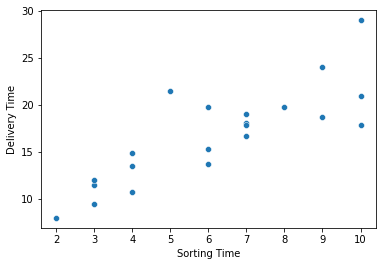

In [6]:
sns.scatterplot(x=SLR['Sorting Time'], y=SLR['Delivery Time']);

In [7]:
SLR.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

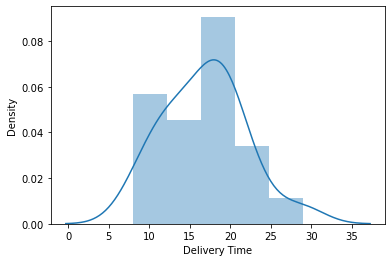

In [8]:
sns.distplot(SLR['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

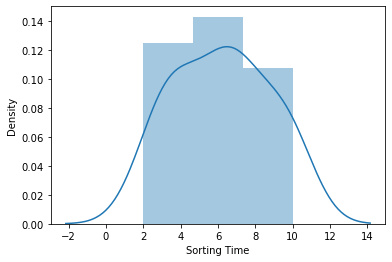

In [9]:
sns.distplot(SLR['Sorting Time'])

In [10]:
SLR.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"}, inplace= True)

In [11]:
SLR

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [68]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time", data=SLR).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

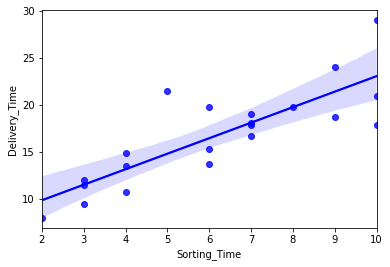

In [69]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=SLR, color='Blue')

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        12:50:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

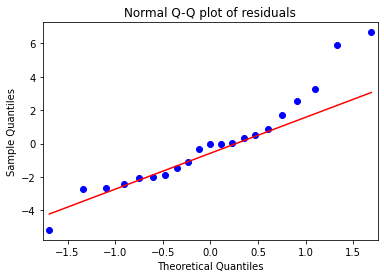

In [71]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [72]:
list(np.where(model.resid>3))

[array([ 2,  4, 20])]

In [74]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

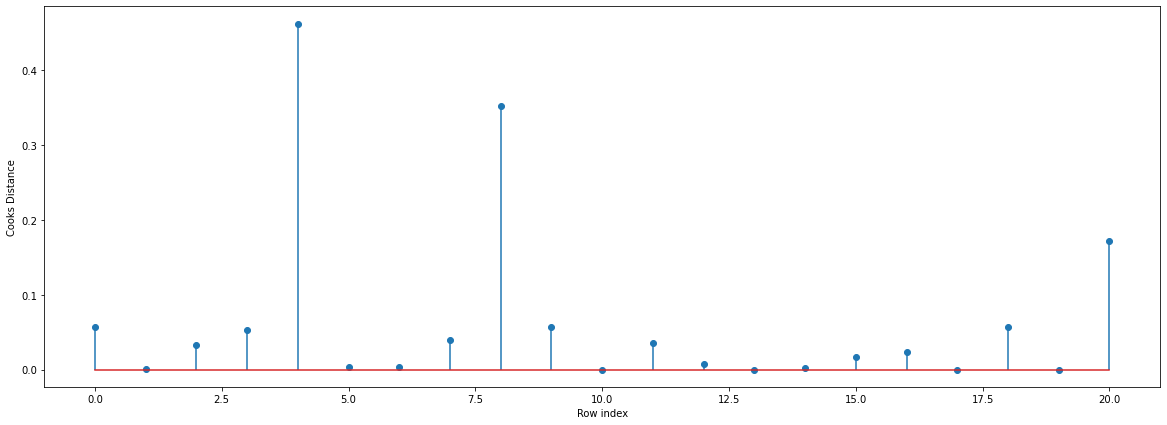

In [75]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(SLR)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

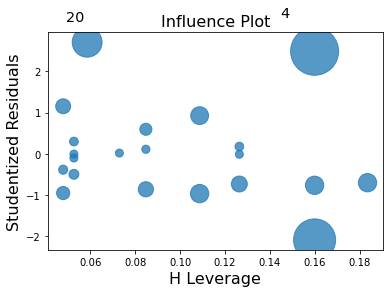

In [77]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [78]:
k = SLR.shape[1]
n = SLR.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42857142857142855

In [79]:
SLR[SLR.index.isin([20, 8])]

,Delivery_Time,Sorting_Time
8,17.9,10
20,21.5,5


In [80]:
SLR1=SLR.drop(SLR.index[[8,20]],axis=0).reset_index()

In [81]:
SLR1

,index,Delivery_Time,Sorting_Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,4,29.00,10
5,5,15.35,6
6,6,19.00,7
7,7,9.50,3
8,9,18.75,9
9,10,19.83,8


In [82]:
import statsmodels.formula.api as smf
model2=smf.ols("Delivery_Time~Sorting_Time", data=SLR1).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

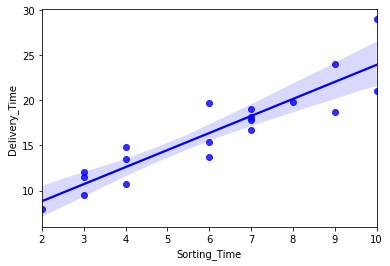

In [83]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=SLR1, color='Blue')

In [84]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     80.30
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           7.54e-08
Time:                        12:51:20   Log-Likelihood:                -41.259
No. Observations:                  19   AIC:                             86.52
Df Residuals:                      17   BIC:                             88.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0332      1.378      3.653      0.002       2.126       7.940
Sorting_Time     1.8920      0.211      8.961      0.000       1.447       2.337
==============================================================================
Omnibus:                        1.437   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.897
Skew:                           0.525   Prob(JB):                        0.639
Kurtosis:                       2.824   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

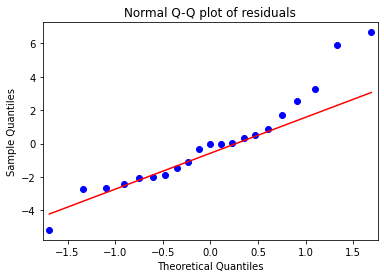

In [85]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [98]:
list(np.where(model2.resid>1.9))

[array([ 2,  3,  4, 14])]

In [99]:
model_influence = model2.get_influence()
(c2, _) = model_influence.cooks_distance

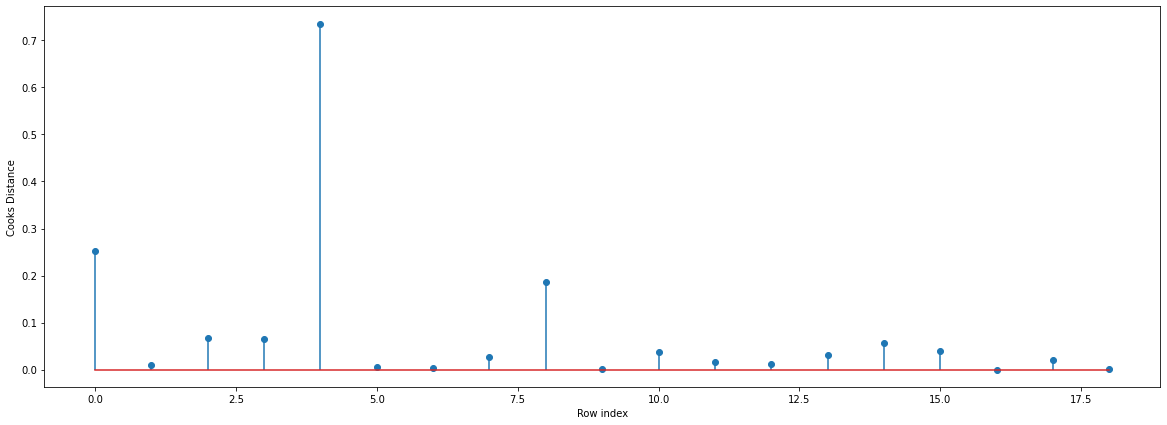

In [100]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(SLR1)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [101]:
(np.argmax(c2),np.max(c2))

(4, 0.735805585546555)

### Since Cook's Distance is <1 we can finalize the model.

In [90]:
model2.params

Intercept       5.03322
Sorting_Time    1.89199
dtype: float64

In [91]:
newdata= pd.Series([5,8])

In [95]:
SLR1_predict=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [96]:
SLR1_predict

,Sorting_Time
0,5
1,8


In [97]:
model2.predict(SLR1_predict)

0    14.493169
1    20.169138
dtype: float64

# Building a prediction model for Salary_Data

In [102]:
Sal= pd.read_csv('/Users/apple/Downloads/Salary_Data.csv')

In [103]:
Sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [104]:
Sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [105]:
Sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


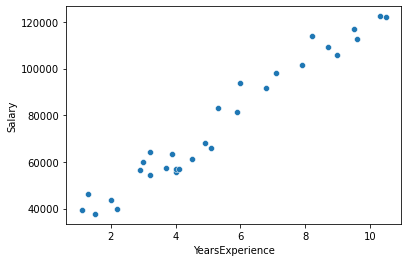

In [107]:
sns.scatterplot(x=Sal['YearsExperience'], y=Sal['Salary']);

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

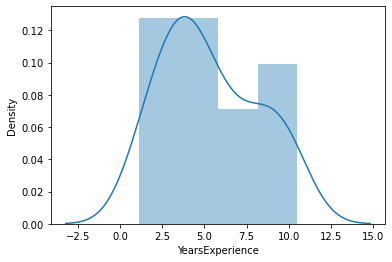

In [109]:
sns.distplot(Sal['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

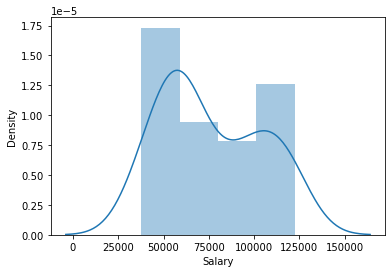

In [110]:
sns.distplot(Sal['Salary'])

In [111]:
Sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [112]:
import statsmodels.formula.api as smf
model4=smf.ols("Salary~YearsExperience", data=Sal).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

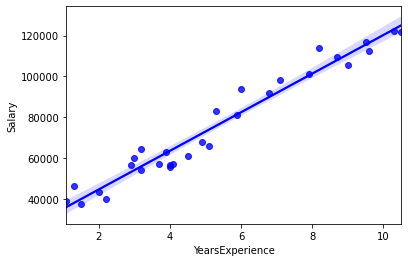

In [113]:
sns.regplot(x="YearsExperience", y="Salary", data=Sal, color='Blue')

In [114]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        13:09:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [117]:
model4.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [118]:
model4.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [119]:
SH=pd.Series([4.3,6.5,2.6])

In [123]:
SH_predict=pd.DataFrame(SH,columns=['YearsExperience'])

In [124]:
SH_predict

,YearsExperience
0,4.3
1,6.5
2,2.6


In [125]:
model4.predict(SH_predict)

0    66427.038181
1    87216.955288
2    50362.102234
dtype: float64